In [1]:
import pylab
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Try with Logistic

In [110]:
X=df[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare',  'Embarked']]

In [111]:
y=df['Survived']

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


#### One- Hot Encoding

In [113]:
Sex_OHE=pd.get_dummies(X['Sex'],drop_first=True)

In [114]:
X=pd.concat([X,Sex_OHE],axis=1)

In [115]:
X.drop(columns=['Sex'],inplace=True)

In [116]:
Embarked_OHE=pd.get_dummies(X['Embarked'],drop_first=True)

In [117]:
X=pd.concat([X,Embarked_OHE],axis=1)

In [118]:
X.drop(columns=['Embarked'],inplace=True)

##### Filling Nan

In [119]:
X['Age'].fillna(X['Age'].mean(),inplace=True)

#### Train _test Split

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

#### Base_Line_Model

In [121]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=1.0,fit_intercept=True,
                             intercept_scaling=1,class_weight=None,random_state=None,
                             solver='lbfgs', max_iter=1000,multi_class='auto', verbose=0, 
                             warm_start=False,n_jobs=None,l1_ratio=None)
clf_log.fit(X_train, y_train)

print('test',clf_log.score(X_test,y_test))
print('train',clf_log.score(X_train,y_train))

test 0.7937219730941704
train 0.8038922155688623


### Feature Transformation

###### Standard Scalar

In [122]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [123]:
X_train_std = pd.DataFrame(sc.fit_transform(X_train))
X_test_std = pd.DataFrame(sc.transform(X_test))

In [125]:
clf_log_sc = LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=1,fit_intercept=True,
                             intercept_scaling=1,class_weight=None,random_state=None,
                             solver='lbfgs', max_iter=1000,multi_class='auto', verbose=0, 
                             warm_start=False,n_jobs=None,l1_ratio=None)
clf_log_sc.fit(X_train_std, y_train)

print('test',clf_log_sc.score(X_test_std,y_test))
print('train',clf_log_sc.score(X_train_std,y_train))

test 0.7937219730941704
train 0.8038922155688623


#### Check Gaussian Distrubution

In [127]:
def Gaus_check(df,col):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[col].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[col],dist='norm',plot=pylab)
    print(col)
    plt.show()


In [128]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

##### Check with Q-Q plots

Pclass


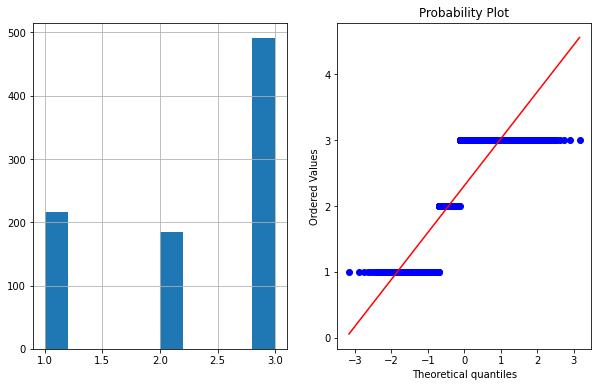

Age


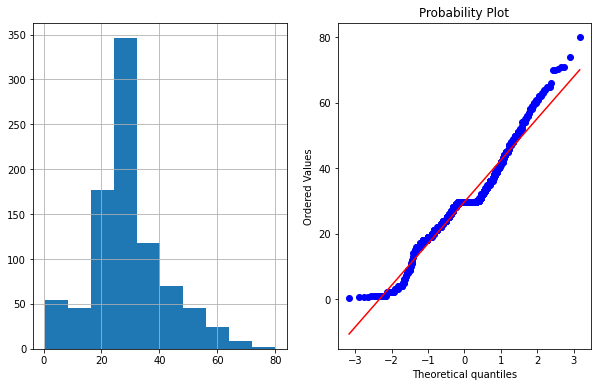

SibSp


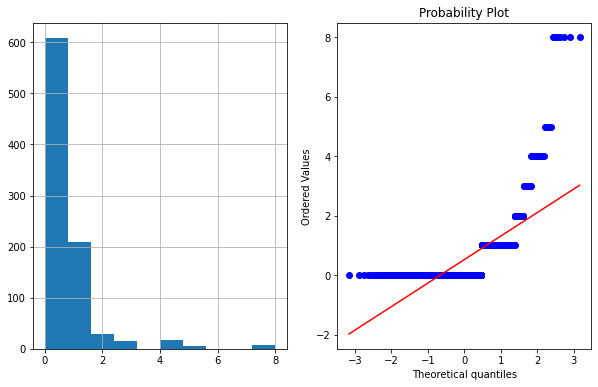

Parch


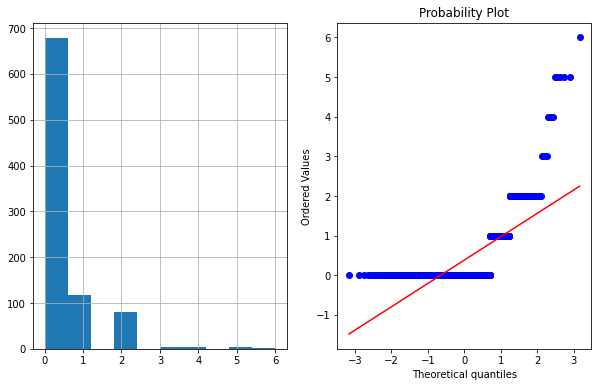

Fare


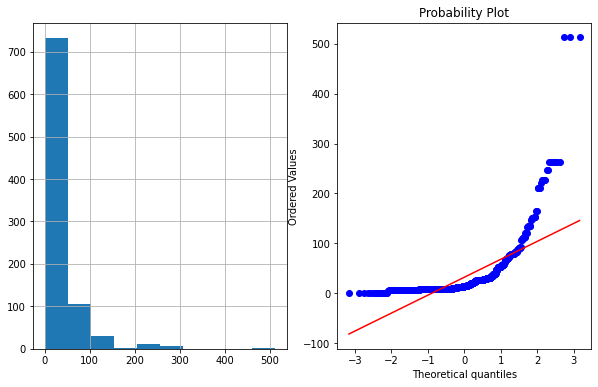

male


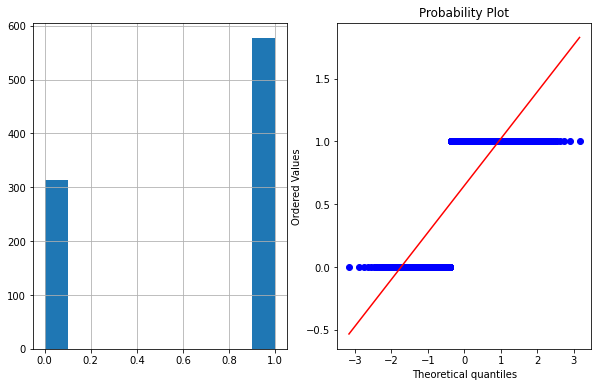

Q


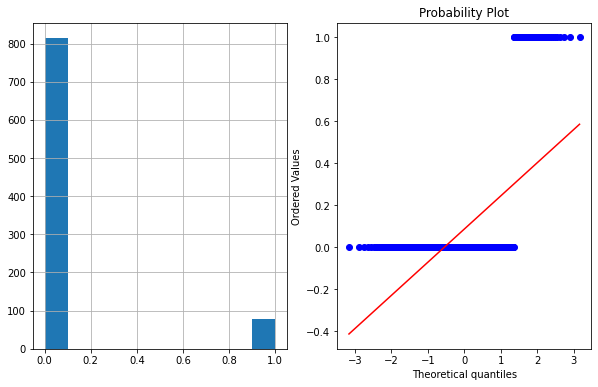

S


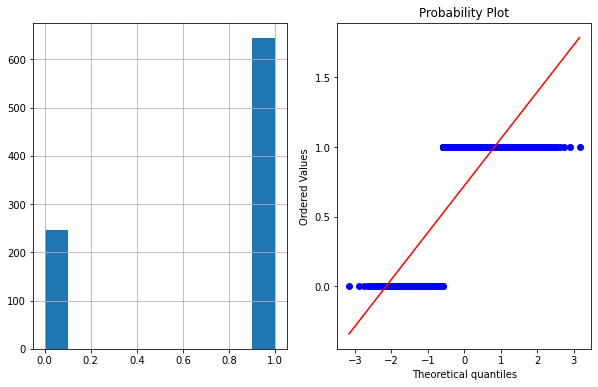

In [89]:
for feature in X.columns:
    Gaus_check(X,feature)

In [136]:
check=pd.DataFrame(np.log(X['Age']))

In [140]:
check['Age_log']=check['Age']

Age_log


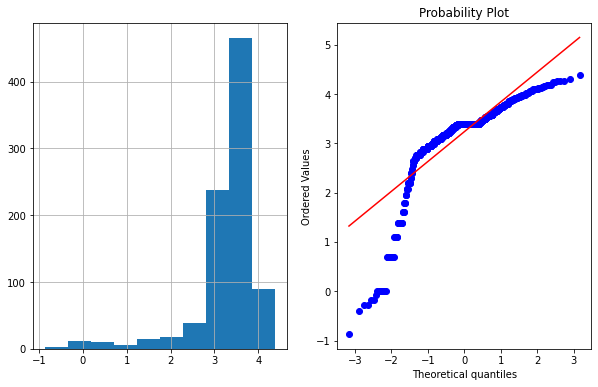

In [164]:
 Gaus_check(check,'Age_log')

In [150]:
check['Age_rec']=pd.DataFrame(1/check['Age'])

In [149]:
filt=check['Age']==0
check['Age'].loc[filt]=.1

Age_rec


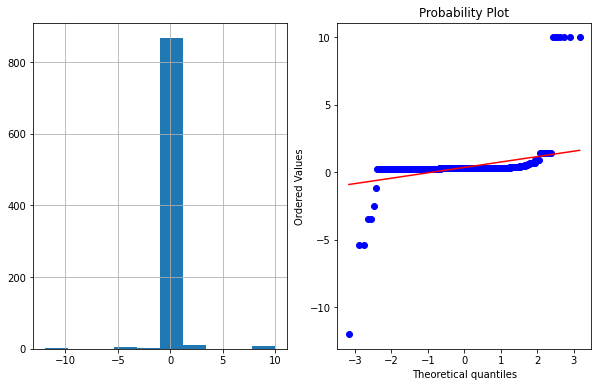

In [154]:
 Gaus_check(check,'Age_rec')

In [159]:
check['Age_sq']=pd.DataFrame(check['Age']**(1/2))

Age_sq


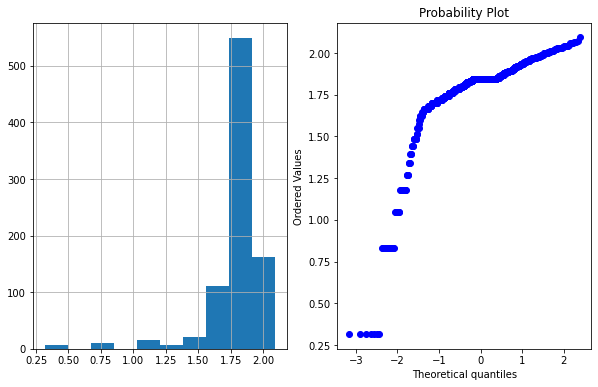

In [165]:
 Gaus_check(check,'Age_sq')

In [162]:
check['Age_exp']=check['Age']**(1/1.2)

Age_exp


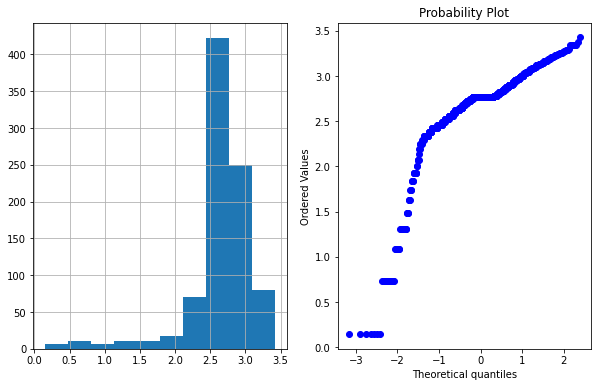

In [166]:
 Gaus_check(check,'Age_exp')

In [168]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [174]:
check['Age_yeo']=pt.fit_transform(check['Age'].values.reshape(-1,1))

Age_yeo


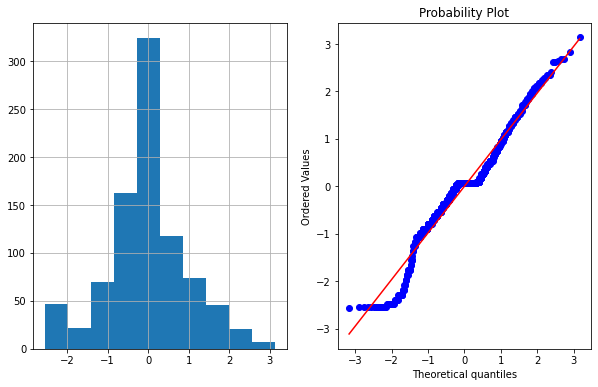

In [175]:
 Gaus_check(check,'Age_yeo')

In [179]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [180]:
X['Age_yeo']=check['Age_yeo']

In [182]:
X.drop(columns=['Age'],inplace=True)

In [205]:
from sklearn.linear_model import LogisticRegression

clf_log_yeo = LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=.1,fit_intercept=True,
                             intercept_scaling=1,class_weight=None,random_state=None,
                             solver='lbfgs', max_iter=500,multi_class='auto', verbose=0, 
                             warm_start=False,n_jobs=None,l1_ratio=None)
clf_log_yeo.fit(X_train, y_train)

print('test',clf_log_yeo.score(X_test,y_test))
print('train',clf_log_yeo.score(X_train,y_train))

test 0.8071748878923767
train 0.8068862275449101
